In [143]:
import cv2 as cv
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import time

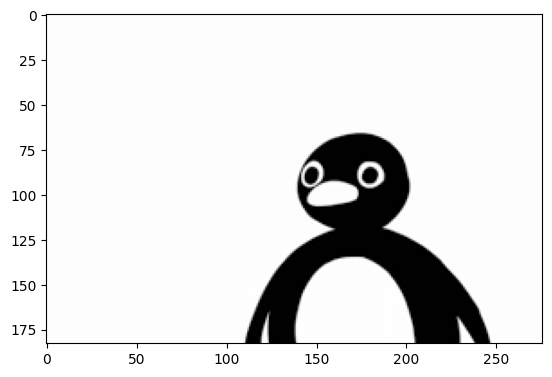

In [144]:
# 3x3 필터 정의
filter_ = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]])

filter_2 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

filter_3 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]])

filter_4 = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

# 이미지 읽기
IMG1 = cv.imread('./testimgs/5.png')[:, :, ::-1]  # BGR -> RGB 변환
gray_image = cv.cvtColor(IMG1, cv.COLOR_RGB2GRAY)  # 흑백 이미지로 변환

plt.imshow(gray_image, cmap='gray')

In [145]:
# t = 1 / 25
# filter_mean = np.array([[t, t, t, t, t],
# 						[t, t, t, t, t],
# 						[t, t, t, t, t],
# 						[t, t, t, t, t],
# 						[t, t, t, t, t]])

In [146]:
# gray_image = convolve2d(gray_image, filter_mean, mode='valid', boundary='fill', fillvalue=0)
# plt.imshow(gray_image, cmap='gray')

0.011970043182373047


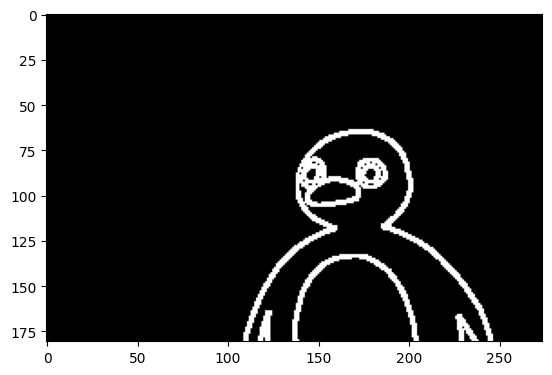

In [147]:
lastTime = time.time()

# 각각의 필터로 컨볼루션 수행
output1 = convolve2d(gray_image, filter_, mode='valid', boundary='fill', fillvalue=0)
output2 = convolve2d(gray_image, filter_2, mode='valid', boundary='fill', fillvalue=0)
output3 = convolve2d(gray_image, filter_3, mode='valid', boundary='fill', fillvalue=0)
output4 = convolve2d(gray_image, filter_4, mode='valid', boundary='fill', fillvalue=0)

# 절댓값을 더해 엣지 강도 계산
output = np.abs(output1) + np.abs(output2) + np.abs(output3) + np.abs(output4)
normalized_output = cv.normalize(output, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
_, binary_output = cv.threshold(normalized_output, 30, 1, cv.THRESH_BINARY)

print(time.time() - lastTime)

plt.imshow(binary_output, cmap='gray')


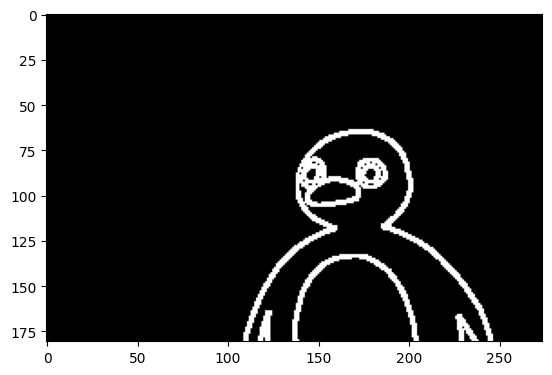

In [148]:
gray_image = convolve2d(binary_output, filter_mean, mode='valid', boundary='fill', fillvalue=0)
_, binary_output = cv.threshold(binary_output, 0.5, 1, cv.THRESH_BINARY)
plt.imshow(binary_output, cmap='gray')

In [149]:
affM1 = np.array([
	[1, 0, 0],
	[0, 1, +1]
], dtype = np.float32)

affM2 = np.array([
	[1, 0, 0],
	[0, 1, -1]
], dtype = np.float32)

affM3 = np.array([
	[1, 0, +1],
	[0, 1, 0]
], dtype = np.float32)

affM4 = np.array([
	[1, 0, -1],
	[0, 1, 0]
], dtype = np.float32)

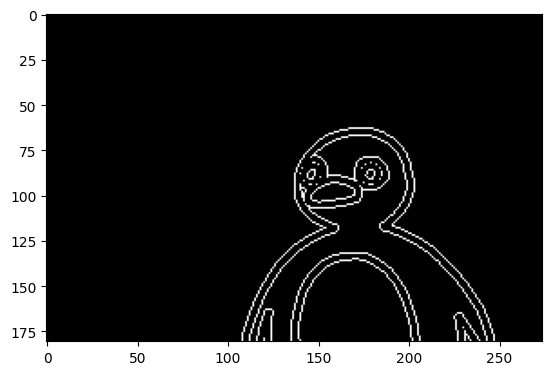

In [150]:
imgShape = (binary_output.shape[1], binary_output.shape[0])

changedImg3 = cv.warpAffine(binary_output, affM1, imgShape) + cv.warpAffine(binary_output, affM2, imgShape) + cv.warpAffine(binary_output, affM3, imgShape) + cv.warpAffine(binary_output, affM4, imgShape)
changedImg3 = np.where(changedImg3 > 0, 1, 0) - binary_output

plt.imshow(changedImg3, cmap='gray')

In [151]:
checkLength = 2
# checkList = [(x, y) for x in range(0, (checkLength-1)*2+1) for y in range(-checkLength, checkLength+1)]
checkList = [
	(0, 1),  (1, 1),
	(0, 0),  (1, 0),
	(0, -1), (1, -1),
]
checkList.remove((0, 0))

0.7837717533111572


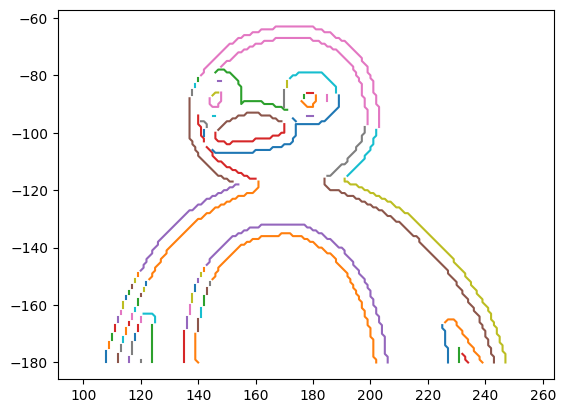

In [152]:
dotListY, dotListX = np.where(changedImg3 == 1)

# 점들로 변환
dotsDict = {k : True for k in sorted([(x, y) for x, y in zip(dotListX, dotListY)], key = lambda x : x[0])}

allGraphDots = []

while True:
	if len(dotsDict) == 0:
		break

	# dotsDict의 첫 데이터 고름
	dotX, dotY = next(iter(dotsDict))
	dotVector = (0, 0)

	dotPoses = [(dotX, dotY)]
	del dotsDict[(dotX, dotY)]

	addDot = 0
	while True:
		possibleNextPlus = [(xx, yy) for xx, yy in checkList if dotsDict.get((dotX + xx, dotY + yy))]
		# print(tmp)
		if len(possibleNextPlus) == 0:
			dotPoses.append((dotX, dotY))
			break
		
		# 여기서 다음 칸 고르기
		nextPlusPos = possibleNextPlus[0]

		dotX += nextPlusPos[0]
		dotY += nextPlusPos[1]

		del dotsDict[(dotX, dotY)]
		# dotsDict.pop((dotX, dotY))

		addDot += 1
		if addDot > 0:
			dotPoses.append((dotX, dotY))
			addDot = 0
	
	if len(dotPoses) > 2:
		allGraphDots.append(dotPoses)

print(time.time() - lastTime)

for data in allGraphDots:
	graphX = []
	graphY = []
	for x, y in data:
		graphX.append(x)
		graphY.append(-y)
		# print(x, y)
	# break
	plt.plot(graphX, graphY)

plt.axis('equal')

# plt.axis('off')

plt.show()